# Report 
## Analyzing the Employees TurnOver

In the following report, we will analyze three main premises:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

Before starting with the first question, we will analyze the dataset to see if we can find insights. First, we will do an Exploratory Analysis by studying statistical data and correlations between the variables (in pairs). After this, we will do a Graphical Analysis. Moreover, we will continue analyzing pairs of data in a deeper way. Once we finish the analysis, we will release the first draft of the insights found.

Then, we will move to the first question, analyzing it from two different angles.

Regarding the second question, we will follow two different strategies, and then we will compare both of them. On one side, we will get the features following a specific Machine Learning Model, and we will generate the equation that allows us to forecast the outcome (if the employee leaves the company or not) using another ML Model.
On the other hand, as a different approach, we will compare several ML algorithms, choosing the best three (following a specific scoring). Then, we will get the best features of each of these three models (and compare if they are the same ones like the ones we got from the previous point). After this, we will hyperparams tune each of the selected models to see if we can improve the scoring. Once this is finished, we will rank the final scores of the three algorithms again, and we will use the Voting model to see if the combination of them is better than using the best algorithm gotten.
Then, we will try to get some predictions using some simulated data, and we will compare the results we got from both of the strategies followed.

Finally, in the last question, we will summarize all the studies done and get some general ideas to implement in the company. 
Also, in a more specific way, we will propose a strategy to follow based on a Command Board. Here the Human Resources team will be able to monitor and predict if and when they have to apply any kind of incentive or specific tool to avoid an employee leaving the company. This command board will measure the urgency of the case so no resources are wasted unnecessarily.


---
# A. Exploratory Analysis
__Importing__

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


__Data Exploration__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


## A.1. Info Summary
- <i> We have 9540 entries, in 10 columns
- <i> We have no NULL values and all the attributes seem to have the correct DataType 

In [4]:
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


__Statistical Summary__
- Satisfaction: its mean is 50%
- Average Hours Worked per month: 184hs
    - In most countries, the legal working schedule per day is (8+1)hs = 9hs. Monthly, this means 180hs.
    - Here, we are saying that the mean is already above the legal number (above this number, the Company should extra compensate the employee). And, on top of that, the first 25th percentil already pass this quantity of hours. This means that more than 75% of the Company works more than what the law establishes (in a different description, we would have to analyze if the employee chose to do the overtime hours or if they have to, and if they are well retributed for these extra-hours or not. As this might impact on the employee's satisfaction)
- Promotion: Only 3% of the employees received any kind of promotion in the past two years.
- Years in the Company (tenure): the average time in the Company is 6.5 years.
- Bonus: Only 21% of the employees received any kind of Bonus.
- Projects: The average # of projects managed by an employee is 3.


## A.2. TurnOver (target value)

In [5]:
df.left.value_counts()

no     6756
yes    2784
Name: left, dtype: int64

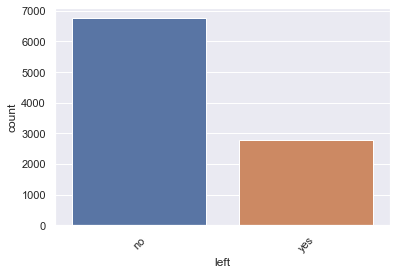

In [6]:
sns.countplot(x='left', data=df)
plt.xticks(rotation=45)
plt.show()

In [7]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('left')
turnOverSummaryMean=turnover_Summary.mean()
turnOverSummaryMean

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
no,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
yes,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


In [8]:
turnover_rate = df.left.value_counts() / df.shape[0]
turnover_rate

no     0.708176
yes    0.291824
Name: left, dtype: float64

- Looks like about 71% of employees stayed and 29% of employees left. 

## A.3.Correlation

Is there any correlation between the variables?

In [9]:
#For analysis purposes, we label-encode the target
dfNumeric=df.copy()
dfNumeric['leftNumeric']=0
dfNumeric.loc[dfNumeric['left']=='yes','leftNumeric']=1
dfNumeric.drop(columns='left',axis=1,inplace=True)
dfNumeric.rename(columns={'leftNumeric':'left'},inplace=True)

firstCol=dfNumeric.loc[:,'left']
restDF=dfNumeric.drop(columns='left',axis=1)
dfNumericCorr=pd.concat([firstCol,restDF], axis=1)

,left,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,1.000000,-0.036777,0.304294,-0.012408,0.010521,-0.009721,-0.011485,0.009008
promoted,-0.036777,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190
review,0.304294,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096
projects,-0.012408,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299
tenure,0.010521,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618
satisfaction,-0.009721,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142
bonus,-0.011485,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370
avg_hrs_month,0.009008,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000


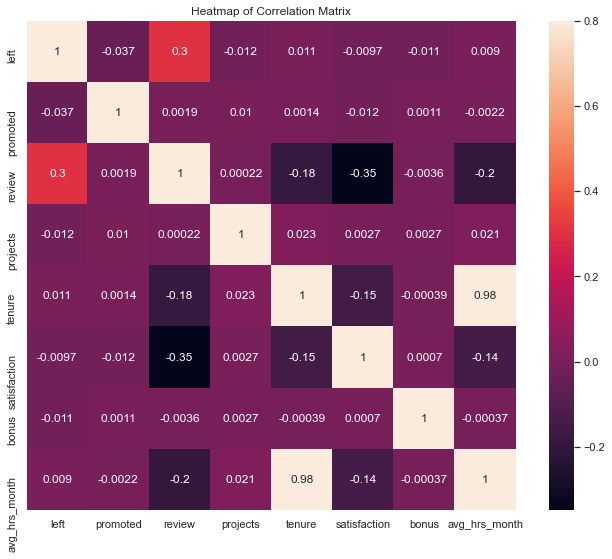

In [10]:
corrmat = dfNumericCorr.corr()
corrmat = (corrmat)
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot = True, vmax=.8, square=True)
plt.title('Heatmap of Correlation Matrix')
corrmat

### A.3.1. Correlation against the Target

In [11]:
dfNumeric.drop(columns='left',axis=1).corrwith(dfNumeric.loc[:,'left'])

promoted        -0.036777
review           0.304294
projects        -0.012408
tenure           0.010521
satisfaction    -0.009721
bonus           -0.011485
avg_hrs_month    0.009008
dtype: float64

### A.3.2. Summary of Correlations

Positive Correlations:
- There is a strong positive relation between 'tenure' and 'avg_hrs_month.' This could mean that the longer the employee is in the company, the more hours he/she works. 
- Also, there is a curious case in the relation between 'review' and 'left' as it looks like the higher the review, the higher the possibilities of leaving the company.


Negative Correlations:
- There is a low-level negative relation between 'review' and 'avg_hrs_month'. This might mean that the lower the review, the employees tend to work more hours.
 - There is a negative relation between 'review' and 'satisfaction'. This means that the higher the review of the employee is, the lower the satisfaction is. This is strange, actually. Maybe the satisfaction level is not acquiring the real employees' satisfaction.

## A.4.Plots

### A.4.1. Distribution

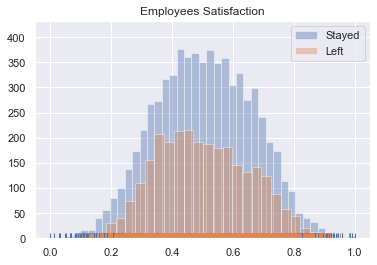

In [12]:
# Graph Employee Satisfaction

# Sort the dataframe by target
target_0 = dfNumeric[dfNumeric.left==0]
target_1 = dfNumeric[dfNumeric.left==1]

sns.distplot(target_0[['satisfaction']], rug=True,kde=False,label='Stayed')
sns.distplot(target_1[['satisfaction']], kde=False, rug=True,label='Left')
plt.title('Employees Satisfaction')
plt.legend()

plt.show()

- The distribution tends to be a normal dist. 
- The distribution of the employees who left it's 'inside' to the one of the employees who Stayed, but it is slightly right-skewed.   

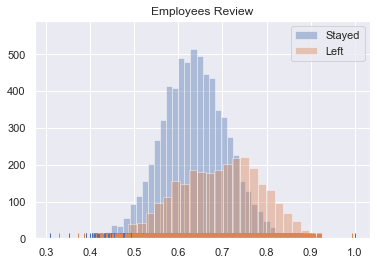

In [13]:
# Graph Employee Review

# Sort the dataframe by target
target_0 = dfNumeric[dfNumeric.left==0]
target_1 = dfNumeric[dfNumeric.left==1]

sns.distplot(target_0[['review']], rug=True,kde=False,label='Stayed')
sns.distplot(target_1[['review']], kde=False, rug=True,label='Left')
plt.title('Employees Review')
plt.legend()

plt.show()

- The distribution of the employees who stayed tends to be a normal dist. 
- The distribution of the employees who left it's left-skewed. 

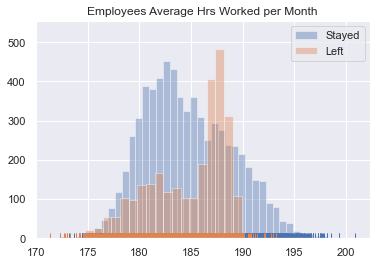

In [14]:
# Graph Employee avg_hrs_month

# Sort the dataframe by target
target_0 = dfNumeric[dfNumeric.left==0]
target_1 = dfNumeric[dfNumeric.left==1]

sns.distplot(target_0[['avg_hrs_month']], rug=True,kde=False,label='Stayed')
sns.distplot(target_1[['avg_hrs_month']], kde=False, rug=True,label='Left')
plt.title('Employees Average Hrs Worked per Month')
plt.legend()

plt.show()

- Here, we see that the maximum values of Average Hours worked per Month belong to the employees who stayed.
- However, there is an important peak between 185 and 190 hours from the employees who left the company.

### A.4.2. Scatter

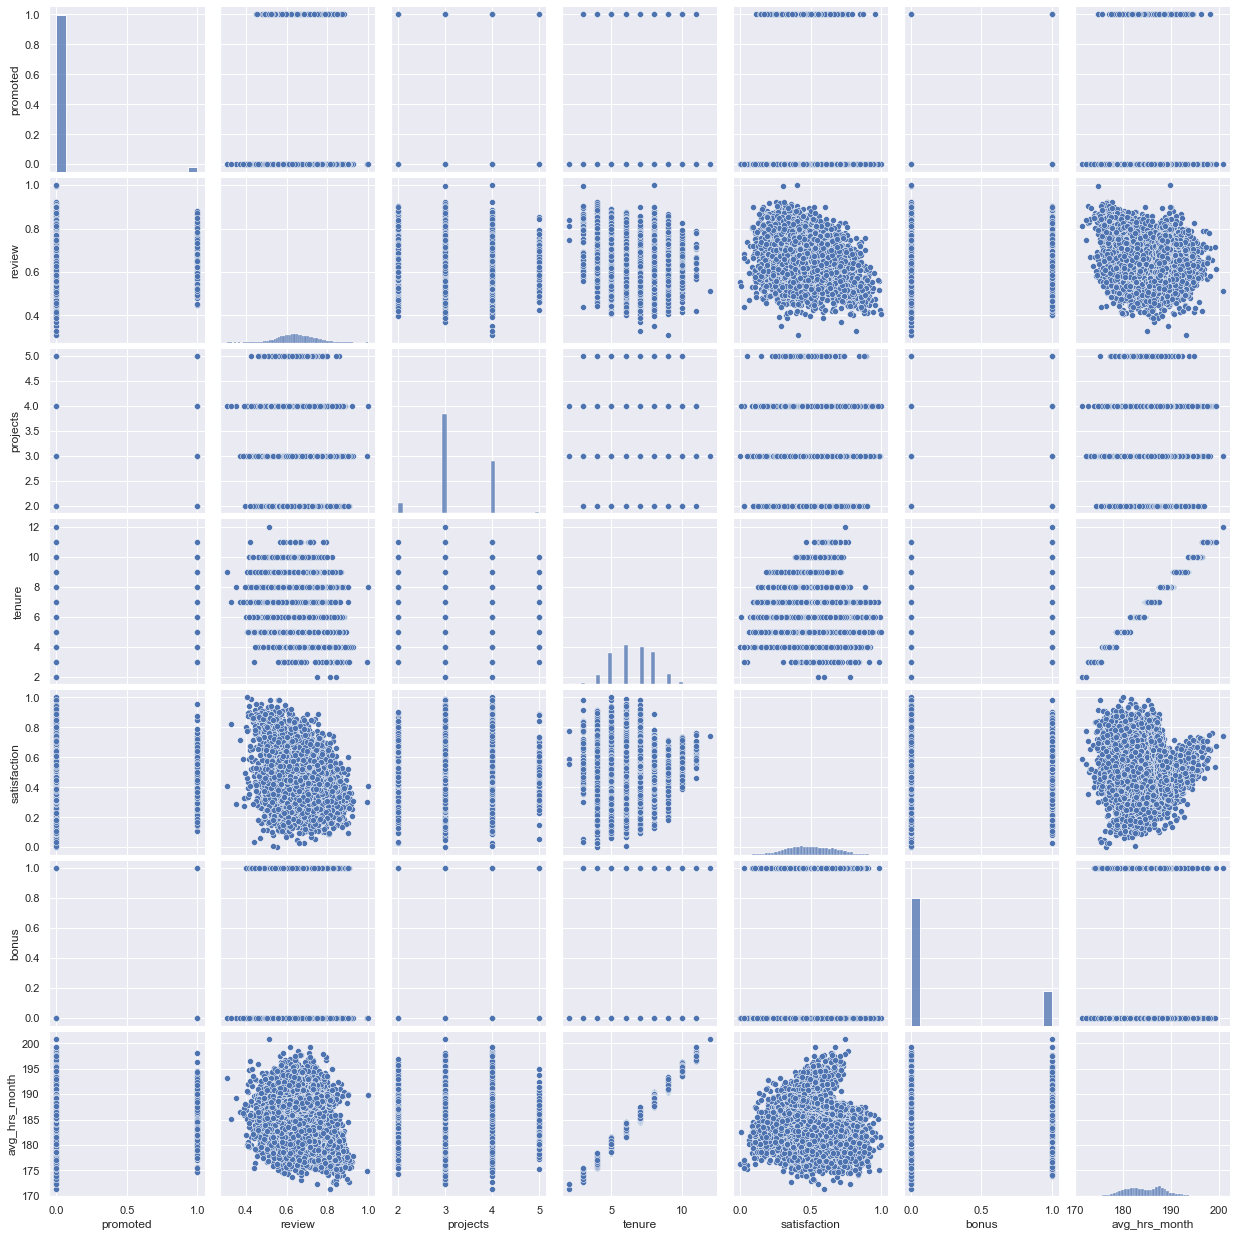

In [15]:
# scatter plot matrix

sns.set()
sns.pairplot(df, size = 2.5)
plt.show()


## A.5. Correlations between pair of values

### A.5.1. Relation between Salary and Target (employees who left)

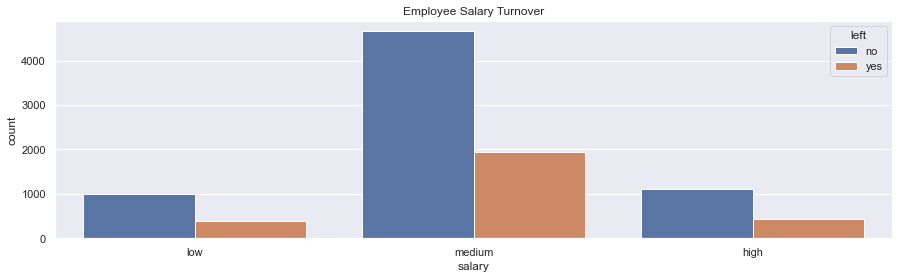

In [16]:
ax = plt.subplots(figsize=(15, 4))
sns.countplot(x="salary", hue='left', data=df).set_title('Employee Salary Turnover')
plt.show()

- There are no important remarks in regards to the Salary distribution

### A.5.2. Relation between Deparment and Target (employees who left)

In [17]:
dfSalaryByDepartment=df
dfSalaryByDepartment['salaryNumeric'] = 0
dfSalaryByDepartment.loc[dfSalaryByDepartment['salary']=='medium','salaryNumeric']=1
dfSalaryByDepartment.loc[dfSalaryByDepartment['salary']=='high','salaryNumeric']=2

dfSalaryByDepartment=df.groupby(['department','salary','salaryNumeric']).count()/df.groupby(['department']).count()
dfSalaryByDepartment=dfSalaryByDepartment[['bonus']]

dfSalaryByDepartment.reset_index(inplace=True)
dfSalaryByDepartment.iloc[:,[0,1,3]]

,department,salary,bonus
0,IT,high,0.165730
1,IT,low,0.120787
2,IT,medium,0.713483
3,admin,high,0.158392
4,admin,low,0.118203
5,admin,medium,0.723404
6,engineering,high,0.155013
7,engineering,low,0.134565
8,engineering,medium,0.710422
9,finance,high,0.174129


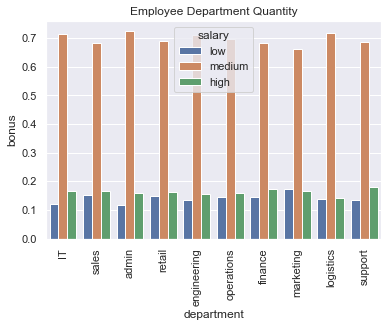

In [18]:
sns.barplot(x='department', y='bonus',hue='salary',data=dfSalaryByDepartment.sort_values(by='salaryNumeric')).set_title('Employee Department Quantity')
plt.xticks(rotation=90)
plt.show()

In [19]:
totalPerDepartment=df.groupby(['department'])[['left']].count()
totalPerDepartment.rename(columns={'left':'totalEmployees'},inplace=True)
totalPerDepartment=totalPerDepartment.reset_index().sort_values(by='totalEmployees',ascending=False)
totalPerDepartment

,department,totalEmployees
8,sales,1883
7,retail,1541
6,operations,1522
2,engineering,1516
5,marketing,802
9,support,735
1,admin,423
3,finance,402
4,logistics,360
0,IT,356


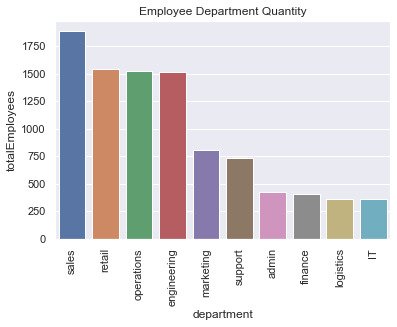

In [20]:
# Employee distribution
sns.barplot(x='department', y='totalEmployees',data=totalPerDepartment).set_title('Employee Department Quantity')
 
# Rotate x-labels
plt.xticks(rotation=90)
plt.show()

In [21]:
numberOfLeftOver=dfNumeric.groupby('department')[['left']].sum()
totalPerDep=totalPerDepartment.rename(columns={'department':'departmentTotal'}).sort_values(by='departmentTotal')
numberOfLeftOver=numberOfLeftOver.reset_index().sort_values(by='left',ascending=False)
numberOfLeft2=numberOfLeftOver.sort_values(by='department')
departmentsDF=pd.concat([numberOfLeft2,totalPerDep],axis=1)
departmentsDF.drop(columns=['departmentTotal'],inplace=True)
departmentsDF['absoluteRatio']=departmentsDF['left']/departmentsDF['totalEmployees'].sum()
departmentsDF['relativeRatio']=departmentsDF['left']/departmentsDF['totalEmployees']
departmentsDF

,department,left,totalEmployees,absoluteRatio,relativeRatio
0,IT,110,356,0.011530,0.308989
1,admin,119,423,0.012474,0.281324
2,engineering,437,1516,0.045807,0.288259
3,finance,108,402,0.011321,0.268657
4,logistics,111,360,0.011635,0.308333
5,marketing,243,802,0.025472,0.302993
6,operations,436,1522,0.045702,0.286465
7,retail,471,1541,0.049371,0.305646
8,sales,537,1883,0.056289,0.285183
9,support,212,735,0.022222,0.288435


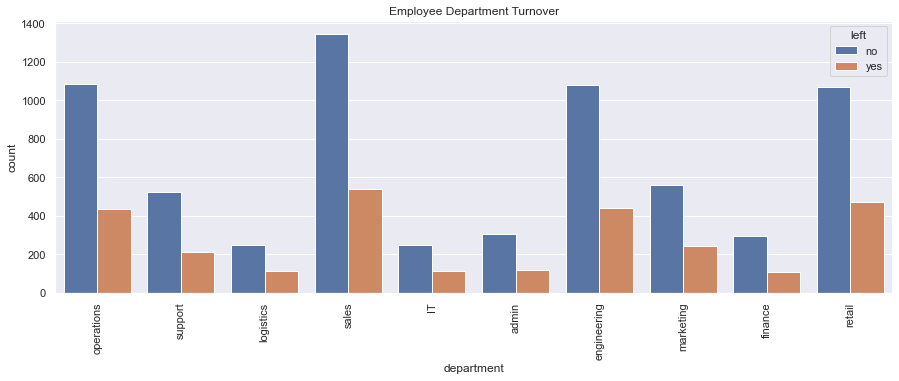

In [22]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="department", hue='left', data=df).set_title('Employee Department Turnover')
plt.xticks(rotation=90)
plt.show()

- The sales, retail, and engineering department were the top 3 employee turnover departments, in absolute numbers.
    - In terms of TurnOver Ratio: IT is the first one, then logistics and then marketing.
    - Why is it important also to consider the ratio? The sales department is the biggest one and had 537 persons who left the company (turnover ratio: 0.285183). This number is already bigger than the whole IT department, which had 110 employees who left the company. Now, taking into consideration that the total # of employees the IT department had was 356, the turnover ratio (0.308989) is bigger than the one from the sales department. 
- The finance department had the smallest amount of turnover both in terms of absolute and relative levels.

__Analyzing by Absolute Values/Ratio__

In [23]:
dfNumeric[dfNumeric.department=='sales'].groupby('left').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
0,0.026746,0.635219,3.302377,6.546062,0.504261,0.220654,184.64599
1,0.026071,0.692769,3.245810,6.510242,0.505169,0.189944,184.54342


We see that, on average, the people who left the Company had a lower bonus than one who stayed, but a better review, which might mean they were good employees.
- The bigger the review is, the more the employees tend to leave the Company

In [24]:
dfNumeric[dfNumeric.department=='finance'].groupby('left').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
0,0.054422,0.637610,3.292517,6.384354,0.505762,0.227891,184.204821
1,0.027778,0.702093,3.296296,6.592593,0.473831,0.240741,184.838697


We see that the employees from Finance (the sector with the smallest turnover both in absolute and relative levels) who left the Company had the highest review than the ones who stayed, and also the biggest bonus, but they were less satisfied.
Anyway, both groups have a bonus bigger than the Company's average one.

- Satisfaction level is important
- The bigger the review is, the more the employees tend to leave the Company

__Analyzing by Relative Levels__

Analyzing the employees from IT

In [25]:
dfNumeric[dfNumeric.department=='IT'].groupby('left').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
0,0.028455,0.631078,3.280488,6.589431,0.521494,0.223577,184.718036
1,0.009091,0.685021,3.309091,6.654545,0.503126,0.218182,185.051092


In terms of relative TurnOver, the employees who left the Company 
- tended to work more hours per month.
- had a bigger review
- had been promoted a lot less

### A.5.3. Relation between # of Projects and Target (employees who left)

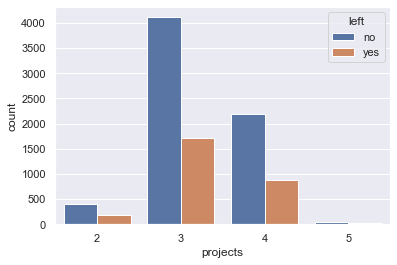

In [26]:
ax = sns.countplot(x="projects", hue="left", data=df)
plt.show()

- No remarks from this analysis

### A.5.4. Relation between Reviews and Target (employees who left)

In [27]:
turnOverSummaryMean

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
no,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
yes,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


In [28]:
target_0=df['left'] == 'no'
target_1=df['left'] == 'yes'

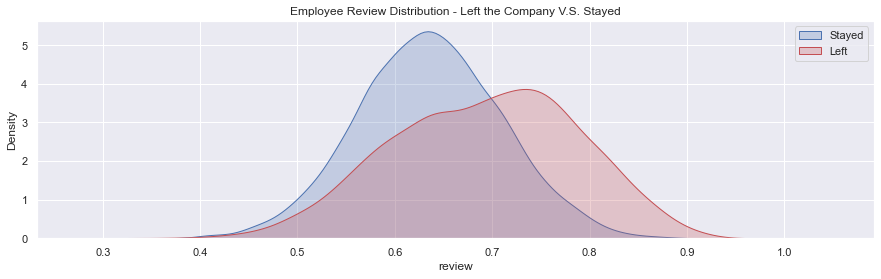

In [29]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(target_0),'review'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(df.loc[(target_1),'review'] , color='r',shade=True, label='Left')
plt.title('Employee Review Distribution - Left the Company V.S. Stayed')
plt.legend()
plt.show()

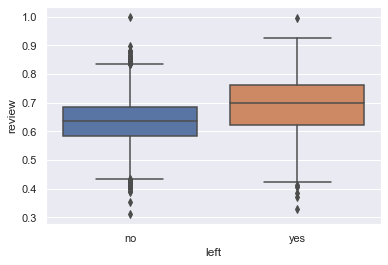

In [30]:
ax = sns.boxplot(x="left", y="review", data=df)


__Breaking the Analysis in Ranges__

In [31]:
def splitRange(theDf,column,minValue,maxValue,numberOfSplits=0,theSteps=0):
    """This function receives a Dataframe, the column that you want to create Ranges from, the Starting Value, the Finishing Value
- the Number of Splits you would like to have, or the steps you would like your range to have.
The first 4 values are mandatory, and then you need to enter either of the last two values."""

    if (theSteps==0) & (numberOfSplits==0):
        print ('Enter the Number or Steps ot the Number of Splits.')
        return
    if numberOfSplits!=0:
        theSteps=maxValue/numberOfSplits

    for i in np.arange(minValue,maxValue,theSteps):
        if i == minValue:
            theDf.loc[(theDf[column]==i),column+'Range']=(str(np.round(i,1))+' - '+str(np.round(i+theSteps,1)))
        
        theDf.loc[(theDf[column]>i) & (theDf[column]<=(i+theSteps)),column+'Range']=(str(np.round(i,1))+' - '+str(np.round(i+theSteps,1)))

        if i+theSteps == maxValue:
            theDf.loc[(theDf[column]==np.float(maxValue)),column+'Range']=(str(np.round(i,1))+' - '+str(np.round(i+theSteps,1)))
    return theDf

In [32]:
tuenumberOfSplits=10
theColumn='review'
theMinValue=0
theMaxValue=1

rangedDf=splitRange(dfNumeric,theColumn,theMinValue,theMaxValue,tuenumberOfSplits)
rangedDf.sort_values(theColumn,inplace=True)

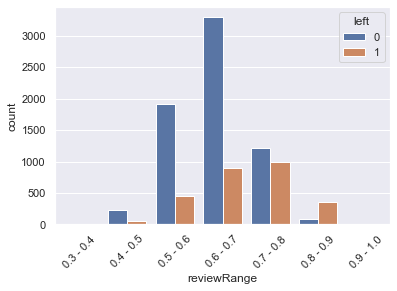

In [33]:
sns.countplot(x='reviewRange',hue='left',data=rangedDf)
plt.xticks(rotation=45)
plt.show()

In [34]:
rangedDf.groupby('reviewRange').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
reviewRange,,,,,,,,
0.3 - 0.4,0.000000,0.366255,3.375000,7.500000,0.490251,0.000000,187.668970,0.375000
0.4 - 0.5,0.021127,0.471155,3.264085,6.866197,0.585176,0.225352,185.688096,0.211268
0.5 - 0.6,0.028187,0.562034,3.281027,6.720656,0.563554,0.214556,185.202270,0.191838
0.6 - 0.7,0.032474,0.648275,3.262178,6.651385,0.513817,0.207259,184.937028,0.213467
0.7 - 0.8,0.029770,0.740481,3.294542,6.428958,0.441698,0.220568,184.236939,0.448805
0.8 - 0.9,0.031042,0.832123,3.277162,5.283814,0.373368,0.199557,180.833566,0.802661
0.9 - 1.0,0.000000,0.921462,3.000000,4.600000,0.342033,0.133333,178.887824,0.933333


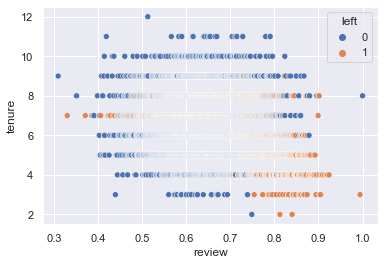

In [35]:
sns.scatterplot(x='review',y='tenure',hue='left',data=rangedDf)
plt.show()

- The mean of the employees who left the company was 0.69.
- We can see that the higher the review score, the more chances the employee leave the company
- On top of that, employees with a review above 0.8 leave the company 90% of the time ((0.8+1)/2)


### A.5.5. Relation between Average Hours worked per Month and Target (employees who left)

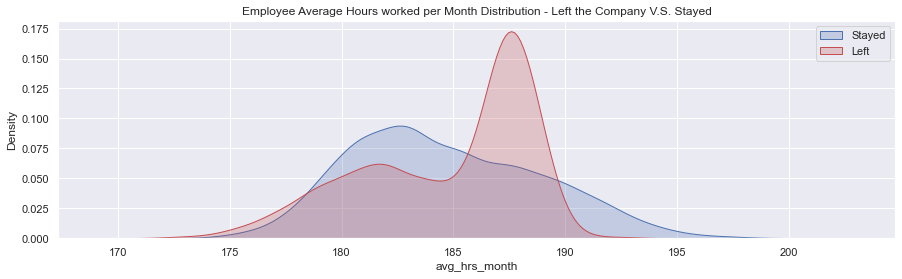

In [36]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(target_0),'avg_hrs_month'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(df.loc[(target_1),'avg_hrs_month'] , color='r',shade=True, label='Left')
plt.title('Employee Average Hours worked per Month Distribution - Left the Company V.S. Stayed')
plt.legend()
plt.show()

- For the employees who stayed in the company, there is a right skewness: the mean is smaller than the median.
- For the employees who left the company, there is a clear left skewness. In this case, they tend to work many more hours than the average of the company.
    - In fact, there is a big peak between 185 and 190 hours.

In general, in all the company the employees tend to do overtime hours.

In [37]:
total=df.groupby('left')[['department']].count()
overTimeHours=df[(df.avg_hrs_month>=185) & (df.avg_hrs_month<=190)]
overTimeHours.groupby('left')[['department']].count()/total

,department
left,
no,0.304766
yes,0.569325


- 56% of the people who left the company were doing between 185 and 190 hs per month. This means between 9:15 and 9:30 hours per day.

__Breaking the Analysis in Ranges__

In [38]:
tuenumberOfSplits=0
theColumn='avg_hrs_month'
theMinValue=170
theMaxValue=205
steps=5

rangedDf=splitRange(dfNumeric,theColumn,theMinValue,theMaxValue,tuenumberOfSplits,steps)
rangedDf.sort_values(theColumn,inplace=True)

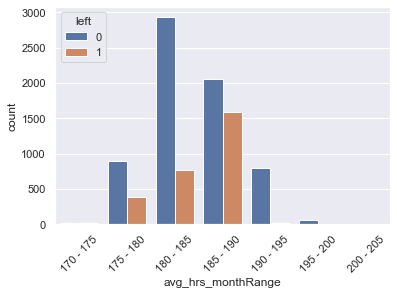

In [39]:
sns.countplot(x='avg_hrs_monthRange',hue='left',data=rangedDf)
plt.xticks(rotation=45)
plt.show()

In [40]:
rangedAVGDf=rangedDf.groupby('avg_hrs_monthRange').mean()
rangedAVGDf.reset_index(inplace=True)
rangedAVGDf

,avg_hrs_monthRange,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
0,170 - 175,0.055556,0.760898,3.250000,2.916667,0.608214,0.138889,174.023432,0.583333
1,175 - 180,0.024942,0.687647,3.255651,4.558846,0.568620,0.208885,178.486336,0.303196
2,180 - 185,0.035946,0.658533,3.272432,5.790000,0.502061,0.213784,182.451945,0.207838
3,185 - 190,0.023600,0.635513,3.277168,7.477497,0.484191,0.212953,187.408187,0.434962
4,190 - 195,0.041514,0.633936,3.300366,8.932845,0.495071,0.207570,191.730056,0.024420
5,195 - 200,0.035088,0.643683,3.368421,10.403509,0.607906,0.210526,196.371355,0.000000
6,200 - 205,0.000000,0.513217,3.000000,12.000000,0.741743,1.000000,200.861656,0.000000


### A.5.6. Relation between Satisfaction and Target (employees who left)

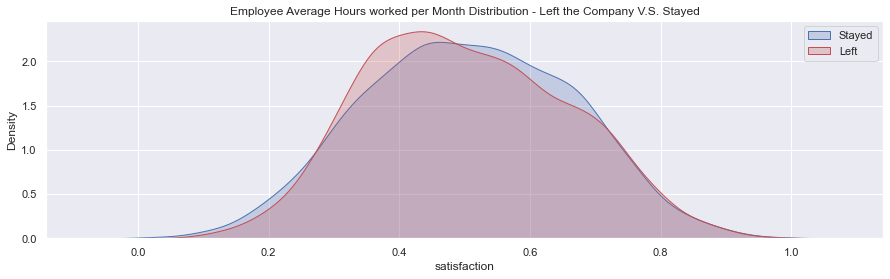

In [41]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(target_0),'satisfaction'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(df.loc[(target_1),'satisfaction'] , color='r',shade=True, label='Left')
plt.title('Employee Average Hours worked per Month Distribution - Left the Company V.S. Stayed')
plt.legend()
plt.show()

- For the employees that stayed in the company, the distribution is slightly normal.
- However, for the employees who left the company, we can see a small right skewness, and we can see a peak below the mean.

__Breaking the Analysis in Ranges__

In [42]:
tuenumberOfSplits=10
theColumn='satisfaction'
theMinValue=0
theMaxValue=1
steps=0

rangedDf=splitRange(dfNumeric,theColumn,theMinValue,theMaxValue,tuenumberOfSplits,steps)

In [43]:
#The database has a an error where the row 1755 has a Satisfaction of 1.0000000000000002, when it should be 1.
#With this line, we modify the error
theSatisfaction=df.iloc[1755].satisfaction
df.index[rangedDf['satisfaction']==theSatisfaction]
rangedDf.iloc[9539,12]='0.9 - 1.0'

In [44]:
rangedDf.sort_values('satisfaction',inplace=True)

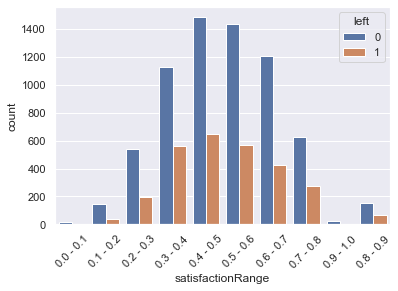

In [45]:
sns.countplot(x='satisfactionRange',hue='left',data=rangedDf)
plt.xticks(rotation=45)
plt.show()

In [46]:
rangedDf.groupby('satisfactionRange').mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
satisfactionRange,,,,,,,,
0.0 - 0.1,0.000000,0.658469,3.150000,4.950000,0.065175,0.150000,179.804302,0.100000
0.1 - 0.2,0.048913,0.677829,3.331522,5.842391,0.165406,0.163043,182.522148,0.222826
0.2 - 0.3,0.031335,0.675027,3.267030,6.422343,0.260044,0.211172,184.250908,0.262943
0.3 - 0.4,0.027284,0.679509,3.263938,6.730130,0.353393,0.218268,185.198822,0.332740
0.4 - 0.5,0.030545,0.674496,3.280075,7.003759,0.449812,0.209117,185.965055,0.303102
0.5 - 0.6,0.037924,0.655816,3.277445,6.787924,0.548742,0.226048,185.285040,0.283433
0.6 - 0.7,0.031843,0.624374,3.272505,6.189835,0.647976,0.195346,183.606978,0.261482
0.7 - 0.8,0.016667,0.592276,3.270000,5.877778,0.741373,0.216667,182.767080,0.306667
0.8 - 0.9,0.009050,0.550986,3.307692,5.601810,0.840572,0.230769,181.857086,0.294118


### A.5.7. Relation between Satisfaction and Review

In [47]:
#The database has a an error where the row 1755 has a Satisfaction of 1.0000000000000002, when it should be 1.
#With this line, we modify the error
theSatisfaction=df.iloc[1755].satisfaction
df.index[rangedDf['satisfaction']==theSatisfaction]
rangedDf.iloc[9539,12]='0.9 - 1.0'

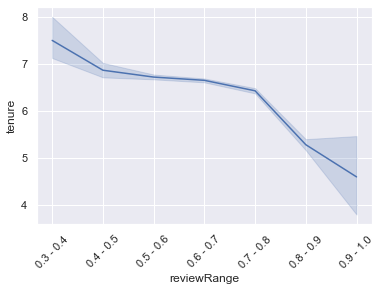

In [48]:
sns.lineplot(x='reviewRange',y='tenure',data=rangedDf.sort_values('review'))
plt.xticks(rotation=45)
plt.show()

- The bigger the satisfaction is, the lower the review is. And vice versa.

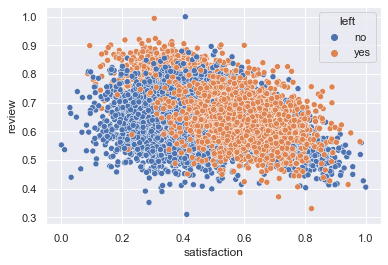

In [49]:
sns.scatterplot(x='satisfaction',y='review',hue='left',data=df)
plt.show()

In terms of employees who left the company, we find two distinctive clusters:
1. Employees with low satisfaction and high review: those might have been good employees but not happy in the company.
2. Most of the employees who left were grouped with a satisfaction above the mean and with an average review.

### A.5.8. Relation between Tenure (years in the company) and Target (employees who left)

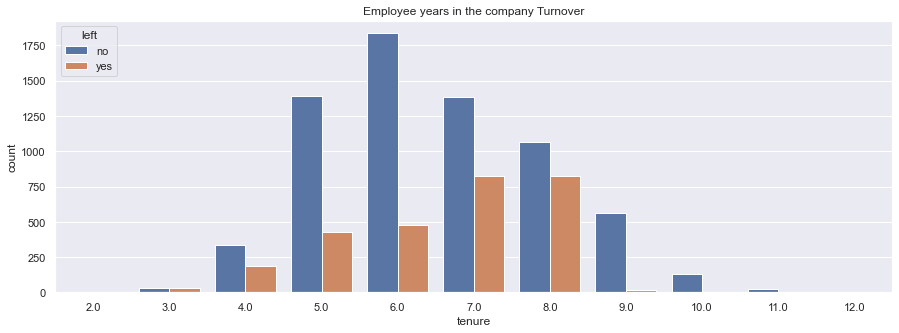

In [50]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="tenure", hue='left', data=df).set_title('Employee years in the company Turnover')
plt.show()

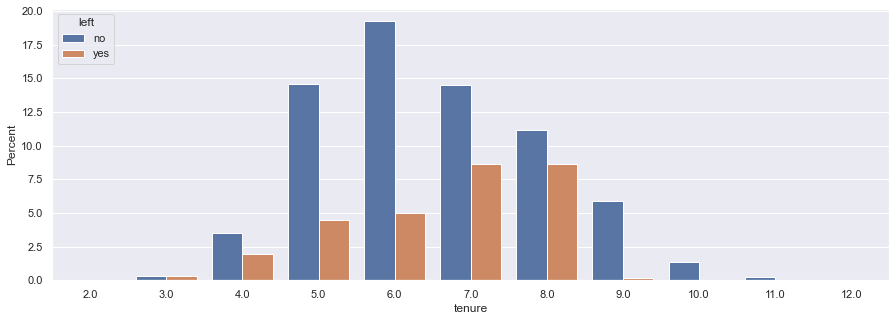

In [51]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="tenure", y="tenure", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.show()

- We see that in the years 3 & 4, and 7 & 8 years in the company, the turnover ratio almost reaches a parity.
- However, due to statistical significance, I would pay special attention to the years 7 and 8
- This might mean that some of the employees who left the company might have been headhunted.

### A.5.9. Relation between Tenure and Average Hours worked in the Month

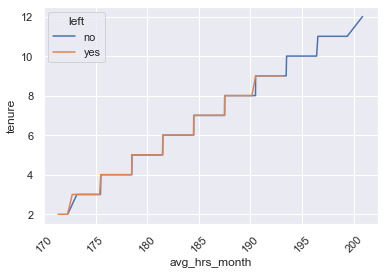

In [52]:
sns.lineplot(x='avg_hrs_month',y='tenure',hue='left',data=df)
plt.xticks(rotation=45)
plt.show()

- Both the employees who stay as the ones who left tend to work more as they have a bigger tenure (more years in the company)

### A.5.10 Relation between Review and Tenure

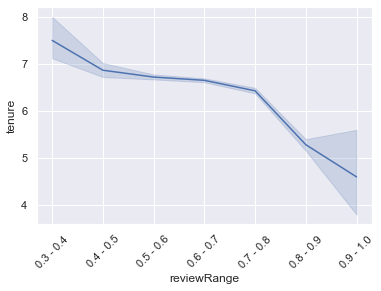

In [53]:
sns.lineplot(x='reviewRange',y='tenure',data=rangedDf.sort_values('review'))
plt.xticks(rotation=45)
plt.show()

- Also, we see that the employees who got the higher reviews were the employees with fewer years in the company

## Preliminary Summary 

- The unique indicator found that directly (and clearly) impacts the outcome (if the employee leaves the Company or not) is the Review of the Employee. The higher the review, the more chances the employee has to leave the Company.
- Linked to the Review indicator, we have the Satisfaction, as higher the review is, the lower the Satisfaction is (it's almost a perfect negative relation with the exception of the first Satisfaction's ranges).


__Statistical Summary__
- Satisfaction: its mean is 50%.
- Average Hours Worked per month: 184hs
- Promotion: Only 3% of the employees received any kind of promotion in the past two years.
- Years in the Company (tenure): the average time in the Company is 6.5 years.
- Bonus: Only 21% of the employees received any kind of Bonus.
- Projects: The average # of projects managed by an employee is 3.
- Review: 
    - Employees with a review above 0.8 leave the Company 90% of the times
    - Employees who got the higher reviews were the employees with fewer years in the Company

__TurnOver__:
- about 71% of employees stayed, and 29% of employees left the Company in the last analyzed period.

__Correlations__
- Positive Correlations:
    - There is a strong positive relation between 'tenure' and 'avg_hrs_month'. This could mean that the longer the employee is in the Company, the more hours he/she works. 
    - Also, there is a curious case in the relation between 'review' and 'left' as it looks like the higher the review, the higher the possibilities of leaving the Company.

- Negative Correlations:
    - There is a low-level negative relation between 'review' and 'avg_hrs_month'. This might mean that the lower the review, the employees tend to work more hours.
    - There is a negative relation between 'review' and 'satisfaction'. This means that the higher the review of the employee is, the lower the Satisfaction is. This is strange, actually. Maybe the satisfaction level is not acquiring the real employees' Satisfaction.


ANALYSIS OF THE EMPLOYEES FROM SALES
We see that, on average, the people who left the Company had a lower bonus than one who stayed, but a better review, which might mean they were good employees.

ANALYSIS OF THE EMPLOYEES FROM FINANCES
We see that the employees from Finance (the sector with the smallest turnover both in absolute and relative levels) who left the Company had the highest review than the ones who stayed, and also the biggest Bonus, but they were less satisfied.
Anyway, both groups had a bonus bigger than the Company's average one.

ANALYSIS OF THE EMPLOYEES FROM IT
In terms of relative TurnOver, the employees who left the Company:
- tended to work more hours per month.
- had a bigger review
- had been promoted a lot less

---
# 1.Which department has the highest employee turnover? Which one has the lowest?

In [54]:
departmentsDF

,department,left,totalEmployees,absoluteRatio,relativeRatio
0,IT,110,356,0.011530,0.308989
1,admin,119,423,0.012474,0.281324
2,engineering,437,1516,0.045807,0.288259
3,finance,108,402,0.011321,0.268657
4,logistics,111,360,0.011635,0.308333
5,marketing,243,802,0.025472,0.302993
6,operations,436,1522,0.045702,0.286465
7,retail,471,1541,0.049371,0.305646
8,sales,537,1883,0.056289,0.285183
9,support,212,735,0.022222,0.288435


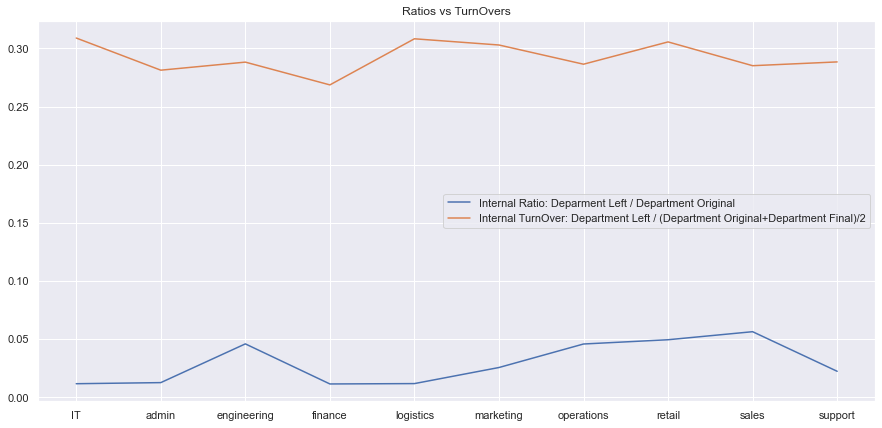

In [55]:
departmentsDF['absoluteRatio'].plot(label = 'Internal Ratio: Deparment Left / Department Original', figsize = (15,7))
departmentsDF['relativeRatio'].plot(label = "Internal TurnOver: Department Left / (Department Original+Department Final)/2")

plt.title('Ratios vs TurnOvers')
plt.legend()
xticks=[i for i in range(len(departmentsDF['department']))]
xlabelsNames=[i for i in departmentsDF['department']]
plt.xticks(xticks, xlabelsNames)
plt.show()

As we can see in this graphic, depending the ratio that it is taken as parameter, the result will change.

## Departments' Analysis
- The Sales, Retail, and Engineering departments were the top 3 employee turnover departments, in absolute numbers.
- In terms of TurnOver Ratio: IT is the first one, then logistics and then marketing.
    - Why is it important also to consider the ratio? Sales are the biggest department in the company (1883 employees) and had 537 employees who left the company (turnover ratio: 0.285). This number is already bigger than the whole IT department (356 employees), who had 110 employees who left the company, with a result of a turnover ratio of 0.308, bigger than the one from the sales department. 
- The finance department had the smallest amount of turnover both in terms of absolute and relative levels.

## 1.1.Departement with the Higest Number of Employee Turnover

In [56]:
print('The department with the highest number of Employees Internal TurnOver is (the department comparing against itself): {}'.format(departmentsDF.iloc[departmentsDF.relativeRatio.idxmax(),0]))
print('The department with the highest number of Employees Total TurnOver is (the department comparing against the whole company): {}'.format(departmentsDF.iloc[departmentsDF.absoluteRatio.idxmax(),0]))

The department with the highest number of Employees Internal TurnOver is (the department comparing against itself): IT
The department with the highest number of Employees Total TurnOver is (the department comparing against the whole company): sales


## 1.2.Departement with the Lowest Number of Employee Turnover

In [57]:
print('The department with the lowest number of Employees Internal TurnOver is (the department comparing against itself): {}'.format(departmentsDF.iloc[departmentsDF.relativeRatio.idxmin(),0]))
print('The department with the lowest number of Employees Total TurnOver is (the department comparing against the whole company): {}'.format(departmentsDF.iloc[departmentsDF.relativeRatio.idxmin(),0]))

The department with the lowest number of Employees Internal TurnOver is (the department comparing against itself): finance
The department with the lowest number of Employees Total TurnOver is (the department comparing against the whole company): finance


---
# 2.Investigate which variables seem to be better predictors of employee departure.

For selecting the Variables/Features that would explain our model, we have two options:
1. We select the features by using a Classification Model and then apply these best features in a Logistic Regression Model
2. We can use other models and compare their accuracy. Then we pick the best model, extract the most important features (according to that model), hyperparams tune it, and see if the final score is better than the previous one.

### 2.1. Option 1: We will select the Most Important Features by applying the Decision Tree Classifier Model (CART), and then apply the Logistic Regression Model in order to obtain the equation (model) that predict the outcome.  

#### Data Preparation & Label Encoding

In [58]:
import warnings
warnings.filterwarnings('ignore')

# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('./data/employee_churn_data.csv')

#We label-encode the target
labelencoder_y = LabelEncoder()
df['left'] = labelencoder_y.fit_transform(df.left)


# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [59]:
#We create a Validation set - Split-out validation dataset
#The columns are removed and only that data is taken

#We take the name of the features, excluding the target.
target_name = 'left'
namesFeatures=df.drop(columns=target_name).columns.values
array = df.values

X = array[:,0:-1]
y = array[:,-1]

# split into 85:15 ration
validation_size = 0.15
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed,stratify=y)

#### Feature Selection with CART (Decision Tree)
Here we will select the most important Features

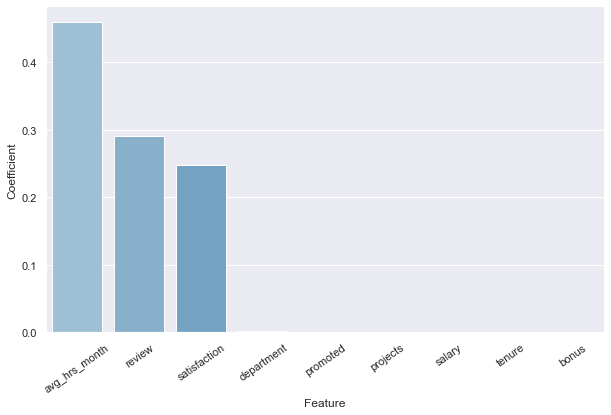

In [60]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Create train and test splits
target_name = 'left'


model = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = model.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['left'],axis=1).columns


 # Get the models coefficients (and top 5)
coeff = pd.DataFrame({'feature_name': feat_names, 'model_coefficient': importances.transpose().flatten()})
coeff = coeff.sort_values('model_coefficient',ascending=False)
coeff_top = coeff.head(10)
coeff_bottom = coeff.tail(10)

# Plot top 5 coefficients
plt.figure().set_size_inches(10, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=35, labels=coeff_top.feature_name)

plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [61]:
theDf = {'Name':feat_names, 'Ranking':importances}
tableFeatures = pd.DataFrame(theDf)
tableFeatures.sort_values(by='Ranking',ascending=False,inplace=True)

selectedFeatures=tableFeatures.Name.head(3)

tableFeatures.head(5)

,Name,Ranking
8,avg_hrs_month,0.459562
2,review,0.289989
6,satisfaction,0.247966
0,department,0.002482
1,promoted,0.000000


According to the features' ranking obtained by applying the Decision Tree Classifier, these are the Top 3 features:
- avg_hrs_month
- review
- satisfaction

We will select and apply them in the next Logistic Regression model to create the equation to predict future outcomes.

#### Logistic Regression using only the selected features

In [62]:
# Create an intercept term for the logistic regression equation
target_name = 'left'

namesFeatures=df.drop(columns=target_name).columns.values

#We create the Intercept 'dummy' variable now.
df['intercept'] = 1

indep_var = [i for i in selectedFeatures]
df = df[indep_var+['intercept',target_name]]

# Create train and test splits
X = df.drop(target_name, axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [63]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train[indep_var+['intercept']],random_state=7)
answer = model.fit()

print(answer.summary())
answer.params

Optimization terminated successfully.
         Current function value: 0.543203
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 8109
Model:                          Logit   Df Residuals:                     8105
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.1003
Time:                        14:44:27   Log-Likelihood:                -4404.8
converged:                       True   LL-Null:                       -4895.7
Covariance Type:            nonrobust   LLR p-value:                1.700e-212
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
avg_hrs_month     0.0617      0.006      9.488      0.000       0.049       0.074
review           11.

avg_hrs_month     0.061653
review           11.104666
satisfaction      2.488504
intercept       -20.897861
dtype: float64

The equation would be:
>Employee Turnover Score = avg_hrs_month*(0.061653) + review*(11.104666) + satisfaction*(2.488504) - 20.897861

__An example of the information we could get from this would be the following: (in the last chapter we will go deeper)__

In [64]:
# Create function to compute coefficients
coef = answer.params

def theAlarm(value):
    
    if (value >=0) & (value <0.25):
        toReturn='\n The Employee is in the 1st Quadrant. \x1b[6;30;42m' + 'No actions should be taken.' + '\x1b[0m'
        return (toReturn)
    elif (value >=0.25) & (value <0.50):
        toReturn='\n The Employee is in the 2nd Quadrant. \x1b[0;30;46m' + 'Pay attention to the employee.' + '\x1b[0m'
        return (toReturn)
    elif (value >=0.50) & (value <0.75):
        toReturn='\n The Employee is in the 3rd Quadrant. \x1b[0;30;43m' + 'Actions should be taken.' + '\x1b[0m'
        return (toReturn)
    else:
        toReturn='\n The Employee is in the 4th Quadrant. \x1b[0;37;41m' + 'Urgent Actions must be taken!' + '\x1b[0m'
        return (toReturn)

def getTurnOver (coef, avg_hrs_month, review, satisfaction) : 
    y = coef[3] + coef[0]*avg_hrs_month + coef[1]*review + coef[2]*satisfaction
    p = np.exp(y) / (1+np.exp(y))
    quadrant=theAlarm(p)
    print ('The Employee is working: {} Hours in Average per Month, has Review of: {}%, and has a Satisfaction level of: {}%. \nThis Employee has {}% chances of leaving the company. {}'.format(avg_hrs_month,review*100,satisfaction*100,np.round(p*100,1),quadrant))


In [65]:
# An Employee with 70% of Satisfaction, 50% of Review, that worked 170 hours in average per month.
averageOverHours=170
review=0.5
satisfaction=0.8

getTurnOver(coef, averageOverHours, review, satisfaction)

The Employee is working: 170 Hours in Average per Month, has Review of: 50.0%, and has a Satisfaction level of: 80.0%. 
This Employee has 5.3% chances of leaving the company. 
 The Employee is in the 1st Quadrant. No actions should be taken.


### 2.2. Option 3: We will rank the scoring of some Machine Learning Classification algorithms according to their respective ROC-AUC in the train set, pick the best one, get the coefficients (most important features), hyperparams tune it, and the final model.

For this process, we will use:
- Cross-Validation: Cross-validation is a technique for evaluating a machine learning model and testing its performance.
    - With Kfold: k-Fold CV is a technique that minimizes the disadvantages of the hold-out method.
- ROC-AUC Score: ROC Curves summarize the trade-off between the true positive rate and false-positive rate for a predictive model using different probability thresholds.
    - We cannot use Accuracy (to test the Accuracy) as we are in an imbalanced-binary-output dataset. False Positive and False Negative errors must be considered, and Accuracy alone does not measure them.

In [66]:
# Load libraries
from sklearn import linear_model

#Cross Validation Techniques
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [67]:
df = pd.read_csv('./data/employee_churn_data.csv')

#We label-encode the target
labelencoder_y = LabelEncoder()
df['left'] = labelencoder_y.fit_transform(df.left)


# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

#We create a Validation set - Split-out validation dataset
#The columns are removed and only that data is taken

#We take the name of the features, excluding the target.
target_name = 'left'
namesFeatures=df.drop(columns=target_name).columns.values
array = df.values

X = array[:,0:-1]
y = array[:,-1]

# split into 85:15 ration
validation_size = 0.15
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed,stratify=y)

In [68]:
num_folds = 5
seed = 7
number_repeats = 3
scoring='roc_auc'

#Select 1 for KFold, 2 for RepeatedStratifiedKFold
cvToUse=1

if cvToUse==1:
    cv = KFold( n_splits=num_folds, 
                shuffle=True,
                random_state=seed
                )
else:
    cv = RepeatedStratifiedKFold(   n_splits=num_folds, 
                                    n_repeats=number_repeats, 
                                    random_state=seed
                                    )

In [69]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis())) #Doesn't allow random_state
models.append(('KNN', KNeighborsClassifier())) #Doesn't allow random_state
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB())) #Doesn't allow random_state
models.append(('SVM', SVC(random_state=seed)))
# ensembles
models.append(('BDT-Ensemble', BaggingClassifier(random_state=seed)))
models.append(('AB-Ensemble', AdaBoostClassifier(random_state=seed)))
models.append(('GBC-Ensemble', GradientBoostingClassifier(random_state=seed)))
models.append(('XGB-Ensemble', XGBClassifier(random_state=seed,eval_metric='logloss'))) #I set this eval_metric for avoiding warning messages.
models.append(('RF-Ensemble', RandomForestClassifier(random_state=seed)))
models.append(('ET-Ensemble', ExtraTreesClassifier(random_state=seed)))

# evaluate each model in turn
resultsSimpler = []
namesSimpler = []


# Create DataFrame  
tableResults = pd.DataFrame(columns=['Name', 'ROC-AUC(Train)', 'STD'])


print("Scoring used: ROC-AUC")
for name, model in models:
    
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
    resultsSimpler.append(cv_results)
    namesSimpler.append(name)
    
    new_row = {'Name':name, 'ROC-AUC(Train)':cv_results.mean(), 'STD':cv_results.std()}
    tableResults = tableResults.append(new_row, ignore_index=True)
    
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)
tableResults=tableResults.sort_values(by='ROC-AUC(Train)',ascending=False)
tableResults
    

Scoring used: ROC-AUC
LR: 0.6939307985118056 (0.015222599204236527)
LDA: 0.7189424885547057 (0.015509742665182055)
KNN: 0.7308053397060327 (0.0077046622782576835)
CART: 0.7855039148935751 (0.009134661911484994)
NB: 0.7127441184325531 (0.012938366031042732)
SVM: 0.61157105872254 (0.01786056670182524)
BDT-Ensemble: 0.9055489950151159 (0.004911097629818087)
AB-Ensemble: 0.8482198674988943 (0.0037887496497835365)
GBC-Ensemble: 0.9204620061188449 (0.004513217863409023)
XGB-Ensemble: 0.9219059521732735 (0.006389556574612421)
RF-Ensemble: 0.9250010593808922 (0.00569482185845855)
ET-Ensemble: 0.9154081004321297 (0.005482901806565513)


,Name,ROC-AUC(Train),STD
10,RF-Ensemble,0.925001,0.005695
9,XGB-Ensemble,0.921906,0.006390
8,GBC-Ensemble,0.920462,0.004513
11,ET-Ensemble,0.915408,0.005483
6,BDT-Ensemble,0.905549,0.004911
7,AB-Ensemble,0.848220,0.003789
3,CART,0.785504,0.009135
2,KNN,0.730805,0.007705
1,LDA,0.718942,0.015510
4,NB,0.712744,0.012938


We can see that with the Logistic Regression model, we are around 69% of Roc-Auc in the train-set, which is not a good score, but it is acceptable. When testing the model against the Test set, the score might drop; however, with some tune in the algorithm's hyperparameters, we could make the score increase again. Nevertheless, we can establish that our predictions (outcome) in the last step will be around that score.
In this case, we will try to improve the score with other models.

We will select the first three best-scored algorithms:

In [70]:
tableResults.head(3)

,Name,ROC-AUC(Train),STD
10,RF-Ensemble,0.925001,0.005695
9,XGB-Ensemble,0.921906,0.006390
8,GBC-Ensemble,0.920462,0.004513


In [135]:
tunedAlgorithmTable = pd.DataFrame(columns=['Name', 'ROC-AUC(Test)','Model','BestEstimator'])

### 2.2.1. Algorithm 1: Random Forect Classifier (RFC)

The Initial Model ROC-AUC on the Test Set is:
0.8296546805405329


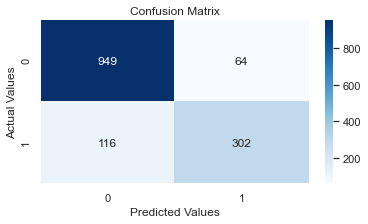

In [136]:
rfc = RandomForestClassifier(random_state=seed)

rfc.fit(X_train, y_train)

# estimate accuracy on validation dataset
predictions = rfc.predict(X_test)

print('The Initial Model ROC-AUC on the Test Set is:')
rfc_roc_auc = roc_auc_score(y_test, predictions)
print(rfc_roc_auc)

## Take the important Features ##
importances = rfc.feature_importances_

cm=confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,3))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

#### Selecting Most Important Features

According to RFC, the most important features to explain the model are:

In [137]:
from sklearn.feature_selection import SelectFromModel

numbers=pd.Series(np.arange(0,len(importances)))
values=pd.Series(importances)

newDF=pd.DataFrame({'id':numbers,'value':values})
newDF.sort_values(by='value',ascending=False,inplace=True)


selectModel = SelectFromModel(rfc, prefit=True)
X_train_new = selectModel.transform(X_train)
X_test_new = selectModel.transform(X_test)

newQuantityOfFeatures=X_train_new.shape[1]
newDF=newDF.iloc[0:newQuantityOfFeatures,:]
theIds=newDF[newDF['value'] == [i for i in newDF.value]].id

selectedFeatures=theIds.values

theDf = {'Name':namesFeatures, 'Ranking':importances}
tableFeatures = pd.DataFrame(theDf)
tableFeatures.sort_values(by='Ranking',ascending=False,inplace=True)

tableFeatures.head(len(theIds))

,Name,Ranking
6,satisfaction,0.289346
8,avg_hrs_month,0.264938
2,review,0.261772


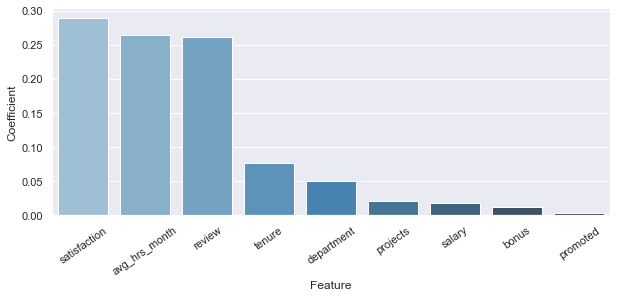

In [138]:
 # Get the models coefficients
coeff = pd.DataFrame({'feature_name': namesFeatures, 'model_coefficient': importances.transpose().flatten()})
coeff = coeff.sort_values('model_coefficient',ascending=False)
coeff_top = coeff.head(10)
coeff_bottom = coeff.tail(10)


plt.figure().set_size_inches(10, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=35, labels=coeff_top.feature_name)

plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.subplots_adjust(bottom=0.4)

As we can see, the Random Forest Model returns the same three features as the Logistic Regression did but is weighted differently.
In this case, the order is:
- Satisfaction
- Average Working Hours per Month
- Review

__Tuning RFC__

In [139]:
# define models
rfc = RandomForestClassifier(random_state=seed)

param_grid = {'n_estimators' : [1100],
                "min_samples_split" : [11],
                'class_weight':["balanced"],
                'max_depth': [None],
                'random_state':[seed],
#               'max_features':['sqrt', 'log2'],  
               'min_samples_leaf': [1]              
                    }
                    

grid_search = GridSearchCV( estimator=rfc, 
                            param_grid=param_grid, 
                            n_jobs=-1, 
                            cv=cv, 
                            scoring=scoring
                            )

grid_result = grid_search.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print('Best Estimator: ',grid_result.best_estimator_)

best_hyperparams=grid_result.best_params_
best_cv_score=grid_result.best_score_


Best: 0.928198 using {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 1100, 'random_state': 7}
Best Estimator:  RandomForestClassifier(class_weight='balanced', min_samples_split=11,
                       n_estimators=1100, random_state=7)


In [140]:
#model
rfc = RandomForestClassifier(**grid_result.best_params_)

# Estimate accuracy on validation dataset
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)


print('The FINAL Model ROC-AUC score on the Test Set is: ')
rfc_roc_auc = roc_auc_score(y_test, predictions)
print(rfc_roc_auc)
print(confusion_matrix(y_test, predictions))

new_row = { 'Name':'RF-Ensemble', 
            'ROC-AUC(Test)':roc_auc_score(y_test, predictions),
            'Model':rfc,
            'BestEstimator':grid_result.best_estimator_}
tunedAlgorithmTable = tunedAlgorithmTable.append(new_row, ignore_index=True)

The FINAL Model ROC-AUC score on the Test Set is: 
0.8505989126994999
[[926  87]
 [ 89 329]]


### 2.2.2. Algorithm 2: Extreme Gradient Boosting (XGB)

The Initial Model ROC-AUC on the Test Set is:
0.8280983577133626


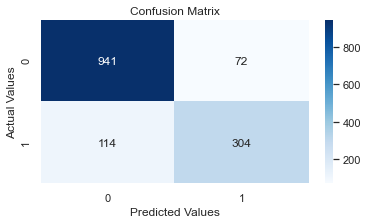

In [141]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

xgb = XGBClassifier(random_state=seed,eval_metric='logloss')

xgb.fit(X_train, y_train)

# estimate accuracy on validation dataset
predictions = xgb.predict(X_test)

print('The Initial Model ROC-AUC on the Test Set is:')
xgb_roc_auc = roc_auc_score(y_test, predictions)
print(xgb_roc_auc)


## Take the important Features ##
importances = xgb.feature_importances_

cm=confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,3))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

#### Selecting Most Important Features

According to XGB, the most important features to explain the model are:

In [142]:
from sklearn.feature_selection import SelectFromModel

numbers=pd.Series(np.arange(0,len(importances)))
values=pd.Series(importances)

newDF=pd.DataFrame({'id':numbers,'value':values})
newDF.sort_values(by='value',ascending=False,inplace=True)


selectModel = SelectFromModel(xgb, prefit=True)
X_train_new = selectModel.transform(X_train)
X_test_new = selectModel.transform(X_test)

newQuantityOfFeatures=X_train_new.shape[1]
newDF=newDF.iloc[0:newQuantityOfFeatures,:]
theIds=newDF[newDF['value'] == [i for i in newDF.value]].id

selectedFeatures=theIds.values

theDf = {'Name':namesFeatures, 'Ranking':importances}
tableFeatures = pd.DataFrame(theDf)
tableFeatures.sort_values(by='Ranking',ascending=False,inplace=True)

tableFeatures.head(len(theIds))

,Name,Ranking
8,avg_hrs_month,0.228939
6,satisfaction,0.200164
2,review,0.175872


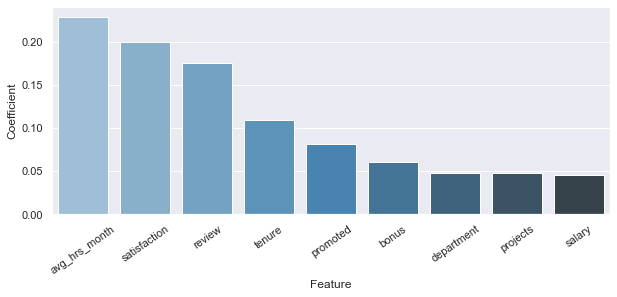

In [143]:
 # Get the models coefficients
coeff = pd.DataFrame({'feature_name': namesFeatures, 'model_coefficient': importances.transpose().flatten()})
coeff = coeff.sort_values('model_coefficient',ascending=False)
coeff_top = coeff.head(10)
coeff_bottom = coeff.tail(10)


plt.figure().set_size_inches(10, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=35, labels=coeff_top.feature_name)

plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.subplots_adjust(bottom=0.4)

As we can see, the Extreme Gradient Boost Model returns the same three features as the Logistic Regression did but is weighted differently.
In this case, the order is:
- Average Working Hours per Month
- Satisfaction
- Review

__Tuning XGB__
<i>I cannot hyperparam tune here</i>

In [144]:
#model
xgb = XGBClassifier(random_state=seed,base_score=0.5, booster='gbtree', colsample_bylevel=1,
                      colsample_bynode=1, colsample_bytree=1, 
                      eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
                      interaction_constraints='', learning_rate=0.300000012,
                      max_delta_step=0, max_depth=5, min_child_weight=1, missing=np.nan,
                      monotone_constraints='()', n_estimators=70, n_jobs=8,
                      num_parallel_tree=1, predictor='auto',
                      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                      tree_method='exact', validate_parameters=1, verbosity=None)
                    
# Estimate accuracy on validation dataset
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

print('The FINAL Model ROC-AUC score on the Test Set is: ')
xgb_roc_auc = roc_auc_score(y_test, predictions)
print(xgb_roc_auc)
print(confusion_matrix(y_test, predictions))

new_row = { 'Name':'XGB-Ensemble',
            'ROC-AUC(Test)':roc_auc_score(y_test, predictions),
            'Model':xgb,
            'BestEstimator':grid_result.best_estimator_}
tunedAlgorithmTable = tunedAlgorithmTable.append(new_row, ignore_index=True)

The FINAL Model ROC-AUC score on the Test Set is: 
0.8334522027045537
[[947  66]
 [112 306]]


### 2.2.3. Algorithm 3: Gradient Boosting

The Initial Model ROC-AUC on the Test Set is:
0.8286675137093383


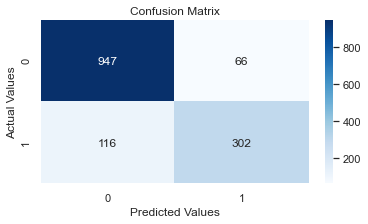

In [145]:
gbc = GradientBoostingClassifier(random_state=seed)

gbc.fit(X_train, y_train)

# estimate accuracy on validation dataset
predictions = gbc.predict(X_test)

print('The Initial Model ROC-AUC on the Test Set is:')
gbc_roc_auc = roc_auc_score(y_test, predictions)
print(gbc_roc_auc)


## Take the important Features ##
importances = gbc.feature_importances_

cm=confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,3))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

#### Selecting Most Important Features

According to GBC/SCG, the most important features to explain the model are:

In [146]:
from sklearn.feature_selection import SelectFromModel

numbers=pd.Series(np.arange(0,len(importances)))
values=pd.Series(importances)

newDF=pd.DataFrame({'id':numbers,'value':values})
newDF.sort_values(by='value',ascending=False,inplace=True)


selectModel = SelectFromModel(gbc, prefit=True)
X_train_new = selectModel.transform(X_train)
X_test_new = selectModel.transform(X_test)

newQuantityOfFeatures=X_train_new.shape[1]
newDF=newDF.iloc[0:newQuantityOfFeatures,:]
theIds=newDF[newDF['value'] == [i for i in newDF.value]].id

selectedFeatures=theIds.values

theDf = {'Name':namesFeatures, 'Ranking':importances}
tableFeatures = pd.DataFrame(theDf)
tableFeatures.sort_values(by='Ranking',ascending=False,inplace=True)

tableFeatures.head(len(theIds))

,Name,Ranking
8,avg_hrs_month,0.384447
6,satisfaction,0.322979
2,review,0.291207


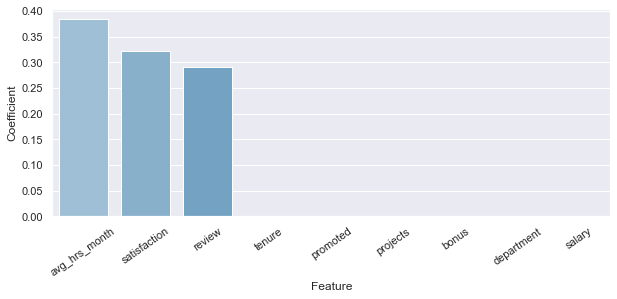

In [147]:
 # Get the models coefficients
coeff = pd.DataFrame({'feature_name': namesFeatures, 'model_coefficient': importances.transpose().flatten()})
coeff = coeff.sort_values('model_coefficient',ascending=False)
coeff_top = coeff.head(10)
coeff_bottom = coeff.tail(10)


plt.figure().set_size_inches(10, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=35, labels=coeff_top.feature_name)

plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.subplots_adjust(bottom=0.4)

As we can see, the Extreme Gradient Boost Model returns the same three features as the Logistic Regression did but is weighted differently.
In this case, the order is:
- Average Working Hours per Month
- Satisfaction
- Review

__Tuning the GBC__

In [148]:
# define models and parameters
gbc = GradientBoostingClassifier()

param_grid = {  'n_estimators' : [80,90],
                "learning_rate" : [0.08,0.1],
                'subsample':[1.0],
                'max_depth': [6,7],
                'random_state':[seed],
                'loss': ['deviance'],
                'max_features':[None],  
                'min_samples_leaf': [1],
                'min_samples_leaf': [2],              
                    }
                    
grid_search = GridSearchCV( estimator=gbc, 
                            param_grid=param_grid, 
                            n_jobs=-1, 
                            cv=cv, 
                            scoring=scoring
                            )

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print('Best Estimator: ',grid_result.best_estimator_)

best_hyperparams=grid_result.best_params_
best_cv_score=grid_result.best_score_

Best: 0.927736 using {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 80, 'random_state': 7, 'subsample': 1.0}
Best Estimator:  GradientBoostingClassifier(max_depth=6, min_samples_leaf=2, n_estimators=80,
                           random_state=7)


In [149]:
#Model
gbc = GradientBoostingClassifier(**grid_result.best_params_)

# Estimate accuracy on validation dataset
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)

print('The FINAL Model ROC-AUC score on the Test Set is: ')
gbc_roc_auc = roc_auc_score(y_test, predictions)
print(gbc_roc_auc)
print(confusion_matrix(y_test, predictions))

new_row = { 'Name':'GBC-Ensemble',
            'ROC-AUC(Test)':roc_auc_score(y_test, predictions),
            'Model':model,
            'BestEstimator':grid_result.best_estimator_}
tunedAlgorithmTable = tunedAlgorithmTable.append(new_row, ignore_index=True)

The FINAL Model ROC-AUC score on the Test Set is: 
0.8430215806949843
[[947  66]
 [104 314]]


### 2.2.4. Voting

__We rank all the tuned-Algorithms by final ROC-AUC score in the test set__

In [150]:
#From this table we will select the most promising algorithms
tunedAlgorithmTable.sort_values(by='ROC-AUC(Test)',inplace=True,ascending=False)
tunedAlgorithmTable.head(10)

,Name,ROC-AUC(Test),Model,BestEstimator
0,RF-Ensemble,0.850599,"(DecisionTreeClassifier(max_features='auto', m...","(DecisionTreeClassifier(max_features='auto', m..."
2,GBC-Ensemble,0.843022,ExtraTreesClassifier(random_state=7),([DecisionTreeRegressor(criterion='friedman_ms...
1,XGB-Ensemble,0.833452,"XGBClassifier(base_score=0.5, booster='gbtree'...","(DecisionTreeClassifier(max_features='auto', m..."


__We Select the top X algorithms for the Voting Ensemble__

In [151]:
#Select the Number of the TOP Algorithms to use
n_Algorithms=2

In [152]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

nameVoting=[]
bestEstimatorVoting=[]

for i in range(n_Algorithms):
    nameVoting.append(tunedAlgorithmTable.iloc[i,:].Name)
    bestEstimatorVoting.append(tunedAlgorithmTable.iloc[i,:].BestEstimator)

newList=zip(nameVoting,bestEstimatorVoting)
newList=list(newList)
theEstimators = newList

VotingPredictor = VotingClassifier( estimators = theEstimators,
                                    voting='soft', 
                                    n_jobs = -1)

VotingPredictor = VotingPredictor.fit(X_train, y_train)


scores = cross_val_score(   VotingPredictor, 
                            X_train, 
                            y_train, 
                            cv = cv,
                            n_jobs = -1, 
                            scoring = scoring)
print("The algorithms used are:")
for i in range(n_Algorithms):                            
    print("{}".format(nameVoting[i]))

print('\nThe Summary')    
print(round(np.mean(scores)*100, 2))

The algorithms used are:
RF-Ensemble
GBC-Ensemble

The Summary
92.97


In [153]:
predictions = VotingPredictor.predict(X_test)
voting_roc_auc=roc_auc_score(y_test, predictions)
print('The FINAL Model Accuracy on the Test Set is: ',voting_roc_auc)



if votingScore>tunedAlgorithmTable.iloc[0,1]:
    print('\nThe top {} combination of models ({}) do better than the best model ({}) alone.'.format(n_Algorithms,theEstimators,tunedAlgorithmTable.iloc[0,0]))
    predictorToUse=VotingPredictor
else:
    print('\nThe best model ({}) alone does better than the Top {} combination of models ({})'.format(tunedAlgorithmTable.iloc[0,0],n_Algorithms,nameVoting))
    predictorToUse=bestEstimatorVoting[0]

The FINAL Model Accuracy on the Test Set is:  0.8466679576982482

The best model (RF-Ensemble) alone does better than the Top 2 combination of models (['RF-Ensemble', 'GBC-Ensemble'])


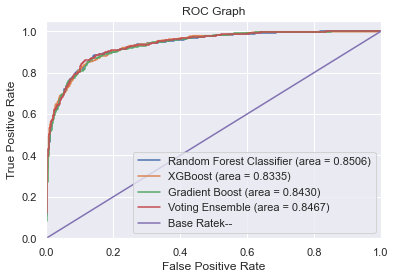

In [155]:
# Create ROC Graph
from sklearn.metrics import roc_curve
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
voting_fpr, voting_tpr, voting_thresholds = roc_curve(y_test, VotingPredictor.predict_proba(X_test)[:,1])


plt.figure()

# Plot RFC ROC
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier (area = %0.4f)' % rfc_roc_auc)

# Plot XGB ROC
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (area = %0.4f)' % xgb_roc_auc)

# Plot GBC ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boost (area = %0.4f)' % gbc_roc_auc)

# Plot Voting ROC
plt.plot(voting_fpr, voting_tpr, label='Voting Ensemble (area = %0.4f)' % voting_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### 2.2.5. Getting Information from the best model (Random Forest)

As we have seen, in the three models developed, the best three features are the same ones as in the Logistic Regression Model shown in the previous point, but in a different order in terms of importance.
Nevertheless, taking into consideration that the Random Forest model got a better ROC-AUC score, let's try to forecast some possible outcomes according to different scenarios.

`It's important to mention that in this case, we won't be able to provide a TurnOver percentage, but just if the employee might leave the company or not.`

In [156]:
#As the three main features explain most of the model, we will get the means for the rest of the features.

department=df.department.mean()
promoted=df.promoted.mean()
projects=df.projects.mean()
salary=df.salary.mean()
tenure=df.tenure.mean()
bonus=df.bonus.mean()

#Scenario 1
averageOverHours1=170
review1=0.6
satisfaction1=0.8

#Scenario 2
averageOverHours2=180
review2=0.7
satisfaction2=0.8

#Scenario 3
averageOverHours3=188
review3=0.8
satisfaction3=0.8

dataSetToTry=[ [department,promoted,review1,projects,salary,tenure, satisfaction1,bonus,averageOverHours1 ],
        [department,promoted,review2,projects,salary,tenure, satisfaction2,bonus,averageOverHours2 ],
        [department,promoted,review3,projects,salary,tenure, satisfaction3,bonus,averageOverHours3 ],]


#### 2.2.5.1. Forecasting with Logistic Model equation

In [157]:
getTurnOver(coef, averageOverHours1, review1, satisfaction1)
getTurnOver(coef, averageOverHours2, review2, satisfaction2)
getTurnOver(coef, averageOverHours3, review3, satisfaction3)

The Employee is working: 170 Hours in Average per Month, has Review of: 60.0%, and has a Satisfaction level of: 80.0%. 
This Employee has 14.6% chances of leaving the company. 
 The Employee is in the 1st Quadrant. No actions should be taken.
The Employee is working: 180 Hours in Average per Month, has Review of: 70.0%, and has a Satisfaction level of: 80.0%. 
This Employee has 49.1% chances of leaving the company. 
 The Employee is in the 2nd Quadrant. Pay attention to the employee.
The Employee is working: 188 Hours in Average per Month, has Review of: 80.0%, and has a Satisfaction level of: 80.0%. 
This Employee has 82.7% chances of leaving the company. 
 The Employee is in the 4th Quadrant. Urgent Actions must be taken!


#### 2.2.5.2. Forecasting with Random Forest Model

In [158]:
def getMessage(thePred):
    for i in range(len(thePred)):
        if thePred[i]==0:
            alert='stays in the company'
        else:
            alert='leaves the company'
        message='The outcome is that the employee {}: {}'.format(i,alert)
        print(message)
thePrediction=predictorToUse.predict(dataSetToTry)

getMessage(thePrediction)

The outcome is that the employee 0: stays in the company
The outcome is that the employee 1: stays in the company
The outcome is that the employee 2: leaves the company


### Summary
Both models are good enough, but according to the ROC-AUC score, the RF one scores better.
Nevertheless, at the end of this Report, we will show how we can establish the Logistic Regression equation to develop a Command Board.

---
# 3.What recommendations would you make regarding ways to reduce employee turnover?

## Overview
As we have found, 'Average Working Hours per Month', 'Review' and 'Satisfaction' are the key variables to pay attention to. Taking into consideration we have developed an equation from these three variables, now we can anticipate some outcomes with decent accuracy.
Before giving specific recommendations and creating an action plan, we need to make a general review of the different indicators. 

### Average Working Hours per Month
In general, in all the company the employees tend to do overtime hours. The mean of the employees' average working hours per month is 184 hs. In most countries, the legal working schedule per day is between 8 and 9 hours per day. Monthly, this means between 160 and 180hs. 
Having this said, the company's mean is already above the legal number (above this number, the company should extra compensate the employee). And, on top of that, the first 25th percentil already pass this quantity of hours. This means that more than 75% of the company works more than what the Law establishes (in a different description, we would have to analyze if the employee chose to do the overtime hours or if they have to. Also, if they are well retributed for these extra hours or not, as this might impact on the employee's satisfaction).

__In conclusion__: more than 75% of the employees do overtime hours. Employees might feel they are overworking.
On top of this, 56% of the people who left the company were doing between 185 and 190 hs per month. This means between 9:15 and 9:30 hours per day.

### Review
The average review of the employees who left the company was 69%. The company is losing good employees.
The highest the review is, the more chances the employee will leave the company. And, on top of that, the highest the review, the lower the satisfaction of the employee is. This means that the company is losing good reviewed employees who are not happy in the company.
Also, there is a relation between review and tenure, where we see that the employees who got the higher reviews were the employees with fewer years in the company.

__In conclusion__: It's clear that the company has a Human capital flight (Brain Drain) as the higher the review, the lower the employee's satisfaction is and the higher the employee's chances are to leave the company.

### Satisfaction
As we mentioned, satisfaction is one of the three most important factors that directly impact the outcome of whether an employee leaves the company or not.

__In conclusion__: A good employee but not happy in the company could be an expensive outcome against the company.

### Tenure
We see that in the years 3 & 4, and 7 & 8 years in the company, the turnover ratio almost reaches a parity. However, due to statistical significance, we should pay special attention to the years 7 and 8. This might mean that some of the employees who left the company might have been head-hunted.

__In conclusion__: Pay special attention to the employees around the tenure years 7 and 8. These might be managers or directors and are being head-hunted.

### Department
It would be more important to analyze the turnovers both my Relative as Absolute Ratios. In one end, analyzing Absolute Ratios in order to have an overall idea of the companies direction, and Relative ones, because there might be specific issues in specific departments, which cannot be easily translated in numbers.

__In conclusion__: getting the department's insights is difficult from a macro-vision perspective. Micromanagement techniques, for example, are difficult to analyze analytically.


### General Observations
- There might be a lack of opportunities for career development. Specific and general development programs could help/
- Internal Transfer/Expats program might be a good way to encourage the employees and raise satisfaction.    
- In some cases, familiar/life events happen, and the employees move from one city/country to other. This way, they leave the company. In this case, trying a reallocation to the city/country, they are thinking to transfer could help. 
- Doing overtime hours might impact the balance between life and work, getting from 'working to live' to 'living to work'. This might be a thing the employees have in mind as soon as they receive any offer, or it might just be the excuse to simply quit. 
- Involuntary terminations might have happened: in case the employees were working on projects, for example.
- There is a possibility that there is negative management in any of the departments. This should be tackled by applying different techniques such as offering programs for the manager, doing activities for team-building, etc.
- As we analyzed, the employees are doing overtime hours. If it is important for the company that the employees to overtime hours (and are well paid for that), maybe establishing a hybrid environment might help the employees to feel more relaxed while working from home.


## 3.1. Specific Recommendations for the Case
The next step must be creating a Command Board where the Human Resources team could monitor all the variables of the employees, and that way, anticipate the possible outcomes.
According to the results of the Outcome Anticipation equation obtained with the most important features, we could position each employee in either of these 4 categories:
1. <i>1st Quadrant</i>: __No Actions__. First 25%. Outcome between 0-0.25 (1st- 25th percentile)
2. <i>2nd Quadrant</i>: __Pay-Atention__ . Second 25%. Outcome between 0.25-0.5 (2nd- 25th percentile)
3. <i>3rd Quadrant</i>: __Take-Actions__ . Third 25%. Outcome between 0-0.25 (3rd- 25th percentile)
4. <i>4th Quadrant</i>: __Urgent-Actions__ . Fourth 25%. Outcome between 0.75-1 (4th- 25th percentile)

<center><img src="thequadrants.png"/></center>


Once we have arrived in the 4th quadrant, it might be too late. That is why the Human Resources team should anticipate great periodical maps to see where the employees are. Also, create automatic triggers, so the system tells the Human Resources they should be attention to a specific employee that has reached any flag value (alert value determined by the company).

> Please refer to the bottom of the following report to see an example of how the Command Board might work.

### Salary raise or Bonus
There is no doubt that the rehiring process is always more expensive than raising the salary or giving a bonus to an employee who is in the 3rd or 4th quadrant. On top of that, we are considering that the average review of the employees who left the company was 69%. This means that the company not only has to replace employees, but they have to replace good employees, which could be even more expensive.

### Reallocation
Reallocating the employee to a different department or offering a transfer could be a solution to avoid losing a good employee.

### Managers' Rotation
In order to avoid MicroManagement, a rotation among the managers or directors could help to refresh the environment and avoid any bad habits that might have been established.

# Command Board
Here, we will show a way potential way to automate a warning system in order to be able to take action before it is too late.
We will simulate four scenarios and show potential messages our HR team could be receiving in each case. For this situation, we will use the Outcome Anticipation equation obtained from the Logistic Regression model.

In [159]:
# Create function to compute coefficients
coef = answer.params

def theAlarm(value):
    
    if (value >=0) & (value <0.25):
        toReturn='\n The Employee is in the 1st Quadrant. \x1b[6;30;42m' + 'No actions should be taken.' + '\x1b[0m'
        return (toReturn)
    elif (value >=0.25) & (value <0.50):
        toReturn='\n The Employee is in the 2nd Quadrant. \x1b[0;30;46m' + 'Pay attention to the employee.' + '\x1b[0m'
        return (toReturn)
    elif (value >=0.50) & (value <0.75):
        toReturn='\n The Employee is in the 3rd Quadrant. \x1b[0;30;43m' + 'Actions should be taken.' + '\x1b[0m'
        return (toReturn)
    else:
        toReturn='\n The Employee is in the 4th Quadrant. \x1b[0;37;41m' + 'Urgent Actions must be taken!' + '\x1b[0m'
        return (toReturn)

def getTurnOver (coef, avg_hrs_month, review, satisfaction) : 
    y = coef[3] + coef[0]*avg_hrs_month + coef[1]*review + coef[2]*satisfaction
    p = np.exp(y) / (1+np.exp(y))
    quadrant=theAlarm(p)
    print ('The Employee is working: {} Hours in Average per Month, has Review of: {}%, and has a Satisfaction level of: {}%. \nThis Employee has {}% chances of leaving the company. {}'.format(avg_hrs_month,review*100,satisfaction*100,np.round(p*100,1),quadrant))


__We will simulate the four different scenarios (4 different employees) we should have to control in the Command Board__

In [160]:
# An Employee with 70% of Satisfaction, 50% of Review, that worked 170 hours in average per month.
averageOverHours=170
review=0.5
satisfaction=0.8

getTurnOver(coef, averageOverHours, review, satisfaction)

The Employee is working: 170 Hours in Average per Month, has Review of: 50.0%, and has a Satisfaction level of: 80.0%. 
This Employee has 5.3% chances of leaving the company. 
 The Employee is in the 1st Quadrant. No actions should be taken.


In [161]:
# An Employee with 70% of Satisfaction, 70% of Review, that worked 175 hours in average per month.
averageOverHours=175
review=0.7
satisfaction=0.7

getTurnOver(coef, averageOverHours, review, satisfaction)

The Employee is working: 175 Hours in Average per Month, has Review of: 70.0%, and has a Satisfaction level of: 70.0%. 
This Employee has 35.6% chances of leaving the company. 
 The Employee is in the 2nd Quadrant. Pay attention to the employee.


In [162]:
# An Employee with 70% of Satisfaction, 80% of Review, that worked 175 hours in average per month.
averageOverHours=175
review=0.8
satisfaction=0.7

getTurnOver(coef, averageOverHours, review, satisfaction)

The Employee is working: 175 Hours in Average per Month, has Review of: 80.0%, and has a Satisfaction level of: 70.0%. 
This Employee has 62.6% chances of leaving the company. 
 The Employee is in the 3rd Quadrant. Actions should be taken.


In [163]:
# An Employee with 70% of Satisfaction, 80% of Review, that worked 188 hours in average per month.
averageOverHours=188
review=0.8
satisfaction=0.7

getTurnOver(coef, averageOverHours, review, satisfaction)

The Employee is working: 188 Hours in Average per Month, has Review of: 80.0%, and has a Satisfaction level of: 70.0%. 
This Employee has 78.9% chances of leaving the company. 
 The Employee is in the 4th Quadrant. Urgent Actions must be taken!
